# Modelos

Luego de tener nuestros datos limpios exportados, procedemos a realizar estandarización y modelos para resolver el problema. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Lectura de datos

Descargamos una muestra del dataset en la carpeta data. Vamos a empezar a explorarlo

In [3]:
df = pd.read_csv('data/data_clean.csv')
df.head()

,n_personas_hogar,lugar_vivienda,edad,cotiza_prestaciones,nivel_educativo,ocupacion,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,recibio_transporte_empresa,recibio_pago_especie,...,recibio_dinero_personas_residentes,recibio_dinero_personas_extranjeras,recibio_ayuda_institucional,recibio_pago_bancos,recibio_cesantias,tiene_edad_trabajar,ingreso_dividendos,ingreso_ayudas_hogares,ingreso_arriendos,ingreso_total_observado
0,1,urbano,33,False,Media,Trabajando,False,False,False,False,...,False,False,False,False,False,True,0.0,0.0,0.0,768000.0
1,1,urbano,31,False,Media,Oficios del hogar,False,False,False,False,...,False,False,False,False,False,True,0.0,0.0,0.0,0.0
2,1,urbano,76,False,Ninguno,Oficios del hogar,False,False,False,False,...,False,False,False,False,False,True,0.0,0.0,0.0,0.0
3,1,urbano,58,True,Básica primaria,Trabajando,False,False,False,False,...,False,False,True,False,False,True,0.0,0.0,0.0,792500.0
4,1,urbano,61,True,Básica primaria,Oficios del hogar,False,False,False,False,...,False,False,False,False,False,True,0.0,0.0,0.0,50000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186550 entries, 0 to 186549
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   n_personas_hogar                     186550 non-null  int64  
 1   lugar_vivienda                       186550 non-null  object 
 2   edad                                 186550 non-null  int64  
 3   cotiza_prestaciones                  186550 non-null  bool   
 4   nivel_educativo                      186550 non-null  object 
 5   ocupacion                            186550 non-null  object 
 6   recibio_alimentos_pago_trabajo       186550 non-null  bool   
 7   recibio_vivienda_pago_trabajo        186550 non-null  bool   
 8   recibio_transporte_empresa           186550 non-null  bool   
 9   recibio_pago_especie                 186550 non-null  bool   
 10  recibio_bonificaciones_anuales       186550 non-null  bool   
 11  horas_semana_

In [5]:
df['lugar_vivienda'].unique()

array(['urbano', 'rural'], dtype=object)

In [6]:
df['is_urbano'] = df['lugar_vivienda'].map({'urbano': True, 'rural': False})

df.drop('lugar_vivienda', axis=1, inplace=True)

df.head()

,n_personas_hogar,edad,cotiza_prestaciones,nivel_educativo,ocupacion,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,recibio_transporte_empresa,recibio_pago_especie,recibio_bonificaciones_anuales,...,recibio_dinero_personas_extranjeras,recibio_ayuda_institucional,recibio_pago_bancos,recibio_cesantias,tiene_edad_trabajar,ingreso_dividendos,ingreso_ayudas_hogares,ingreso_arriendos,ingreso_total_observado,is_urbano
0,1,33,False,Media,Trabajando,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,768000.0,True
1,1,31,False,Media,Oficios del hogar,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,0.0,True
2,1,76,False,Ninguno,Oficios del hogar,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,0.0,True
3,1,58,True,Básica primaria,Trabajando,False,False,False,False,False,...,False,True,False,False,True,0.0,0.0,0.0,792500.0,True
4,1,61,True,Básica primaria,Oficios del hogar,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,50000.0,True


1= 'urbano', 0='rural'

In [7]:
print(df['nivel_educativo'].unique())
print(df['ocupacion'].unique())

['Media' 'Ninguno' 'Básica primaria' 'Básica secundaria'
 'No sabe, no informa' 'Superior o universitaria' 'Preescolar']
['Trabajando' 'Oficios del hogar' 'Incapacitado permanente'
 'Otra actividad' 'Buscando trabajo' 'Estudiando']


In [8]:
df['nivel_educativo'] = df['nivel_educativo'].replace('No sabe, no informa', 'Ninguno')

In [9]:
nivel_educativo_order = ['Ninguno', 'Preescolar', 'Básica primaria', 'Básica secundaria', 'Media', 'Superior o universitaria']

# Aplicar un CategoricalDtype para darle el orden a la columna
df['nivel_educativo'] = pd.Categorical(df['nivel_educativo'], categories=nivel_educativo_order, ordered=True)

# Convertir las categorías a números
df['nivel_educativo'] = df['nivel_educativo'].cat.codes

df.head()

,n_personas_hogar,edad,cotiza_prestaciones,nivel_educativo,ocupacion,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,recibio_transporte_empresa,recibio_pago_especie,recibio_bonificaciones_anuales,...,recibio_dinero_personas_extranjeras,recibio_ayuda_institucional,recibio_pago_bancos,recibio_cesantias,tiene_edad_trabajar,ingreso_dividendos,ingreso_ayudas_hogares,ingreso_arriendos,ingreso_total_observado,is_urbano
0,1,33,False,4,Trabajando,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,768000.0,True
1,1,31,False,4,Oficios del hogar,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,0.0,True
2,1,76,False,0,Oficios del hogar,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,0.0,True
3,1,58,True,2,Trabajando,False,False,False,False,False,...,False,True,False,False,True,0.0,0.0,0.0,792500.0,True
4,1,61,True,2,Oficios del hogar,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,50000.0,True


In [10]:
df = pd.get_dummies(df, columns=['ocupacion'], drop_first=True)

df.head()

,n_personas_hogar,edad,cotiza_prestaciones,nivel_educativo,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,recibio_transporte_empresa,recibio_pago_especie,recibio_bonificaciones_anuales,horas_semana_trabajo,...,ingreso_dividendos,ingreso_ayudas_hogares,ingreso_arriendos,ingreso_total_observado,is_urbano,ocupacion_Estudiando,ocupacion_Incapacitado permanente,ocupacion_Oficios del hogar,ocupacion_Otra actividad,ocupacion_Trabajando
0,1,33,False,4,False,False,False,False,False,72.000000,...,0.0,0.0,0.0,768000.0,True,False,False,False,False,True
1,1,31,False,4,False,False,False,False,False,44.925939,...,0.0,0.0,0.0,0.0,True,False,False,True,False,False
2,1,76,False,0,False,False,False,False,False,44.925939,...,0.0,0.0,0.0,0.0,True,False,False,True,False,False
3,1,58,True,2,False,False,False,False,False,40.000000,...,0.0,0.0,0.0,792500.0,True,False,False,False,False,True
4,1,61,True,2,False,False,False,False,False,14.000000,...,0.0,0.0,0.0,50000.0,True,False,False,True,False,False


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['n_personas_hogar', 'edad', 'horas_semana_trabajo', 
                'ingreso_dividendos', 'ingreso_ayudas_hogares', 'nivel_educativo']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [12]:
df.head()

,n_personas_hogar,edad,cotiza_prestaciones,nivel_educativo,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,recibio_transporte_empresa,recibio_pago_especie,recibio_bonificaciones_anuales,horas_semana_trabajo,...,ingreso_dividendos,ingreso_ayudas_hogares,ingreso_arriendos,ingreso_total_observado,is_urbano,ocupacion_Estudiando,ocupacion_Incapacitado permanente,ocupacion_Oficios del hogar,ocupacion_Otra actividad,ocupacion_Trabajando
0,-0.094055,-0.485648,False,0.668407,False,False,False,False,False,2.709272,...,-0.009193,-0.151868,0.0,768000.0,True,False,False,False,False,True
1,-0.094055,-0.594655,False,0.668407,False,False,False,False,False,0.000000,...,-0.009193,-0.151868,0.0,0.0,True,False,False,True,False,False
2,-0.094055,1.857985,False,-2.632181,False,False,False,False,False,0.000000,...,-0.009193,-0.151868,0.0,0.0,True,False,False,True,False,False
3,-0.094055,0.876929,True,-0.981887,False,False,False,False,False,-0.492933,...,-0.009193,-0.151868,0.0,792500.0,True,False,False,False,False,True
4,-0.094055,1.040438,True,-0.981887,False,False,False,False,False,-3.094725,...,-0.009193,-0.151868,0.0,50000.0,True,False,False,True,False,False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186550 entries, 0 to 186549
Data columns (total 29 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   n_personas_hogar                     186550 non-null  float64
 1   edad                                 186550 non-null  float64
 2   cotiza_prestaciones                  186550 non-null  bool   
 3   nivel_educativo                      186550 non-null  float64
 4   recibio_alimentos_pago_trabajo       186550 non-null  bool   
 5   recibio_vivienda_pago_trabajo        186550 non-null  bool   
 6   recibio_transporte_empresa           186550 non-null  bool   
 7   recibio_pago_especie                 186550 non-null  bool   
 8   recibio_bonificaciones_anuales       186550 non-null  bool   
 9   horas_semana_trabajo                 186550 non-null  float64
 10  recibio_pagos_arriendos              186550 non-null  bool   
 11  recibio_pagos

## KNN sin PCA

Se inicia con n_clusters igual a 4 porque son los identificados por el DANE:
    
- Pobreza
- Vulnerable
- Clase media
- Clase alta

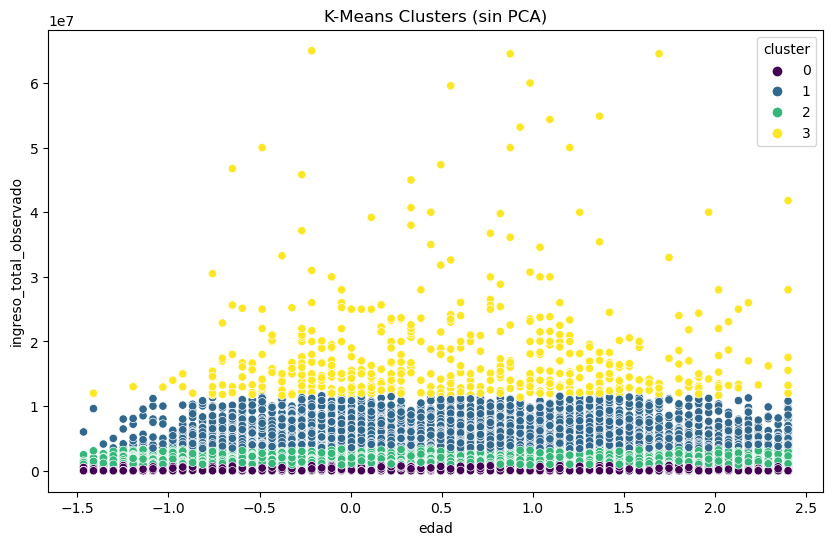

In [14]:
from sklearn.cluster import KMeans

# Definir el número de clusters
num_clusters = 4

# Aplicar K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=10101, n_init=10)
kmeans.fit_predict(df)

df['cluster'] = kmeans.labels_

# Visualizar los clusters formados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='edad', y='ingreso_total_observado', hue='cluster', data=df, palette='viridis')
plt.title('K-Means Clusters (sin PCA)')
plt.show()

## PCA

In [15]:
from sklearn.decomposition import PCA

df_standardized =df.copy()

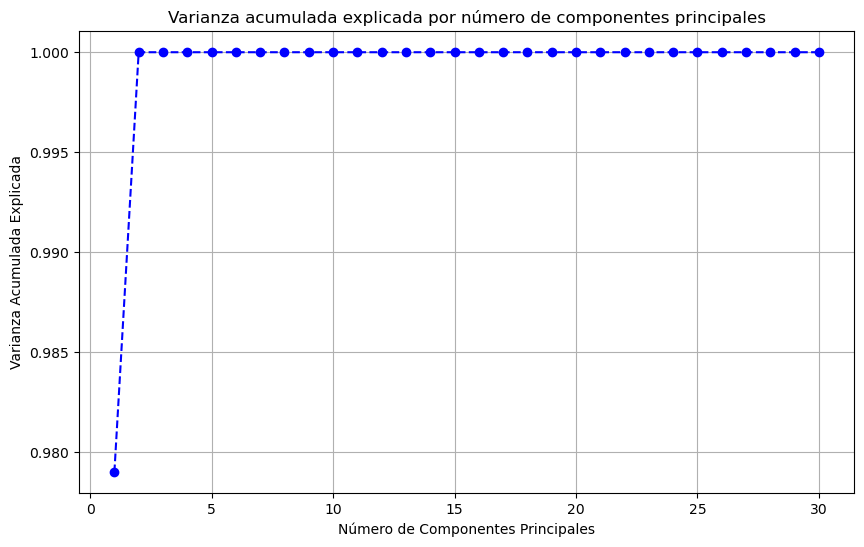

In [16]:
# Calculo PCA y grafica de varianza acumulada  explicada
pca = PCA(random_state=123)
X_pca = pca.fit_transform(df_standardized)

explained_variance = pca.explained_variance_ratio_
explained_variance_cumsum = np.cumsum(explained_variance)

# Crear el gráfico de sedimentación
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance_cumsum, marker='o', linestyle='--', color='b')
plt.title('Varianza acumulada explicada por número de componentes principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.grid(True)
plt.show()

In [17]:
pca = PCA(n_components=0.98, random_state=123)
X_pca = pca.fit_transform(df_standardized)
print("Cantidad de componentes que explican el 99% de la varianza:  " + str(X_pca.shape[1]))

Cantidad de componentes que explican el 99% de la varianza:  2


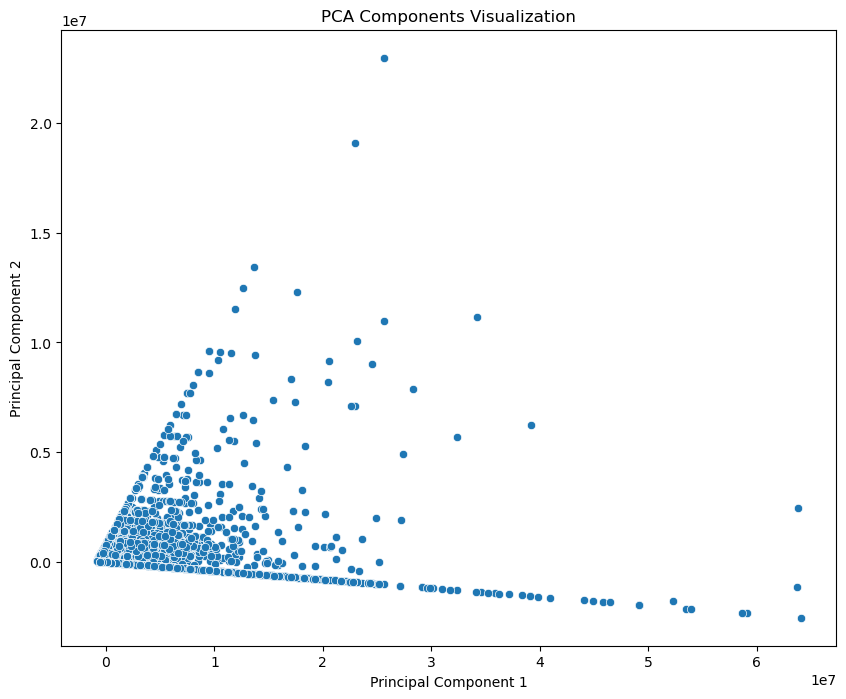

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.title('PCA Components Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [19]:
X_pca

array([[-9.21299635e+04, -1.89196094e+04],
       [-8.59530711e+05,  1.14134329e+04],
       [-8.59530711e+05,  1.14134329e+04],
       ...,
       [ 1.83336644e+06, -9.50286883e+04],
       [-5.59764794e+05, -4.35411742e+02],
       [-5.68091625e+05, -1.06277168e+02]])

In [20]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

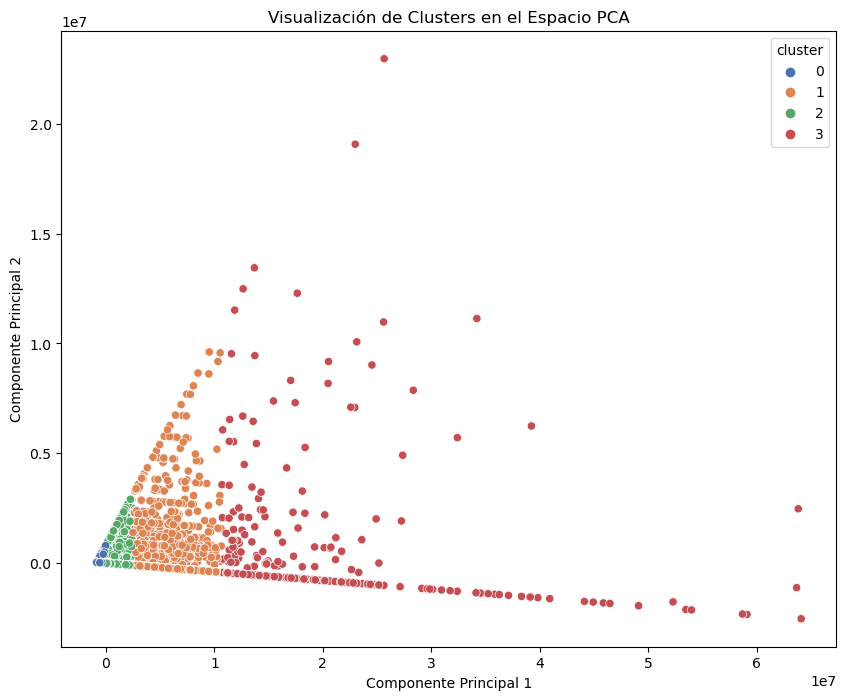

In [21]:
num_clusters = 4

# Aplicar K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=10101, n_init=10)
kmeans.fit_predict(df_pca)

df_pca['cluster'] = kmeans.labels_

# Visualizar los clusters formados
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='deep')
plt.title('Visualización de Clusters en el Espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Clustering DBSCAN
clustering = DBSCAN(eps=0.3, min_samples=5)  # Ajustar eps y min_samples
clustering.fit(df_pca)
df_pca['cluster_dbscan'] = clustering.labels_

# Visualización
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_dbscan', data=df_pca, palette='deep')
plt.title('Clustering DBSCAN')
plt.show()